In [48]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 4.9 MB/s eta 0:00:0000:0100:01


In [68]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from scipy.integrate import trapezoid
from scipy.optimize import curve_fit
import scienceplots

plt.style.use(['science', 'notebook'])
!pwd

/home/student/maslov


In [16]:
def get_p(dir):

    pxx = pd.read_csv(f'./12_surface_tension/{dir}/px.txt', names=['Ncount', 'c_stress_atom[1]'], sep=' ')['c_stress_atom[1]']
    pyy = pd.read_csv(f'./12_surface_tension/{dir}/py.txt', names=['Ncount', 'c_stress_atom[2]'], sep=' ')['c_stress_atom[2]']
    pzz = pd.read_csv(f'./12_surface_tension/{dir}/pz.txt', names=['Ncount', 'c_stress_atom[3]'], sep=' ')['c_stress_atom[3]']
    dens = pd.read_csv(f'./12_surface_tension/{dir}/densityx.txt', names=['Ncount', 'dens'], sep=' ')['dens']
    
    return pxx, pyy, pzz, dens


In [17]:
data = []

for dir in ('cut5', 'cut6', 'cut7'):
    
    pxx, pyy, pzz, dens = get_p(dir)
    data.append([pxx, pyy, pzz, dens])
    

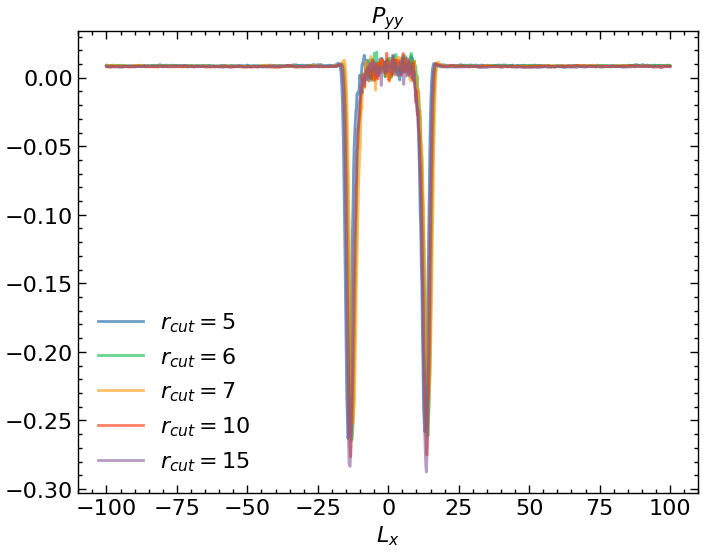

In [104]:
alph = 0.6
n_range = np.linspace(0, 1000, 100)
Lx = 200
grid = np.linspace(-Lx / 2, Lx / 2, len(pxx))
for i in [5, 6, 7, 10, 15]:
    
    pxx, pyy, pzz, dens = get_p(f'cut{i}')
    plt.plot(grid, -pyy * dens, alpha=alph, label=f'$r_{{cut}} ={i}$')
plt.legend();
plt.xlabel('$L_x$')
plt.title('$P_{yy}$');

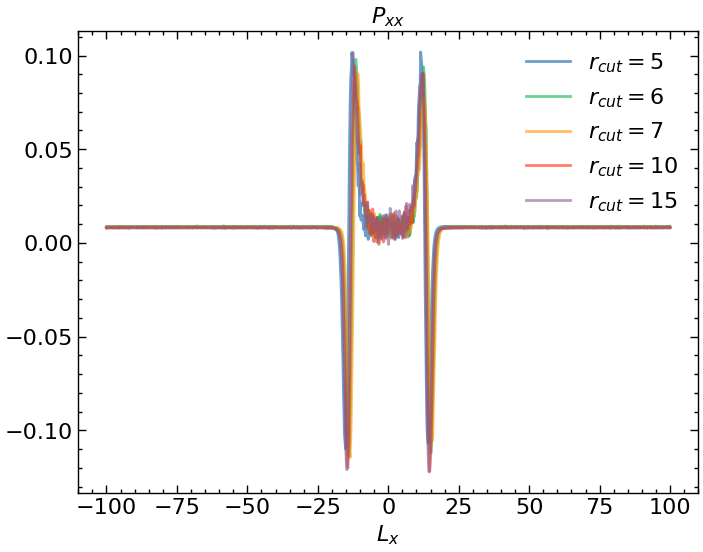

In [106]:
alph = 0.6
n_range = np.linspace(0, 1000, 100)
# plt.plot(-pxx * dens, alpha=alph, label='pxx')
# plt.plot(-pyy * dens, alpha=alph, label='pyy')
grid = np.linspace(-Lx / 2, Lx / 2, len(pxx))
for i in [5, 6, 7, 10, 15]:
    
    pxx, pyy, pzz, dens = get_p(f'cut{i}')
    plt.plot(grid, -pxx * dens, alpha=alph, label=f'$r_{{cut}} ={i}$')
plt.legend();
plt.xlabel('$L_x$')
plt.title('$P_{xx}$');

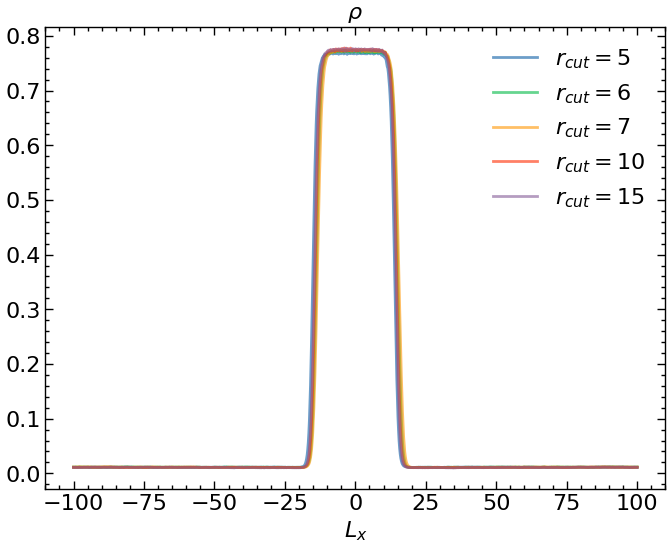

In [136]:
alph = 0.6
n_range = np.linspace(0, 1000, 100)
# plt.plot(-pxx * dens, alpha=alph, label='pxx')
# plt.plot(-pyy * dens, alpha=alph, label='pyy')
grid = np.linspace(-Lx / 2, Lx / 2, len(pxx))
for i in [5, 6, 7, 10, 15]:
    
    pxx, pyy, pzz, dens = get_p(f'cut{i}')
    plt.plot(grid, dens, alpha=alph, label=f'$r_{{cut}} ={i}$')
plt.legend();
plt.xlabel('$L_x$')
plt.title('$\\rho$');

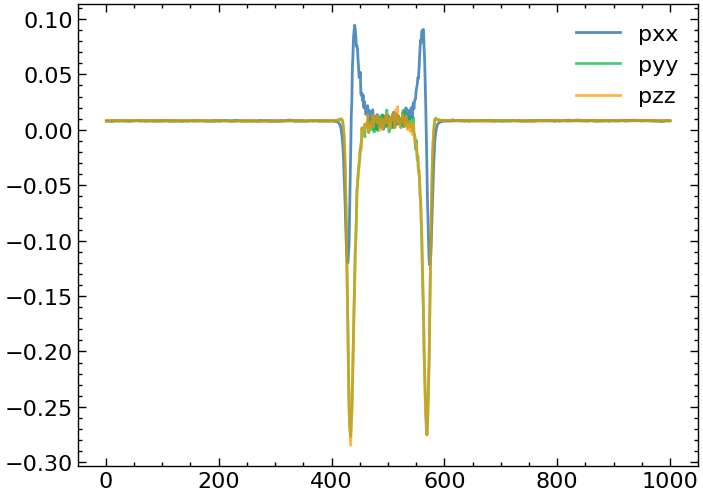

In [ ]:
alph = 0.7
n_range = np.linspace(0, 1000, 100)
plt.plot(-pxx * dens, alpha=alph, label='pxx')
plt.plot(-pyy * dens, alpha=alph, label='pyy')
plt.plot(-pzz * dens, alpha=alph, label='pzz')
plt.legend();
# plt.savefig()

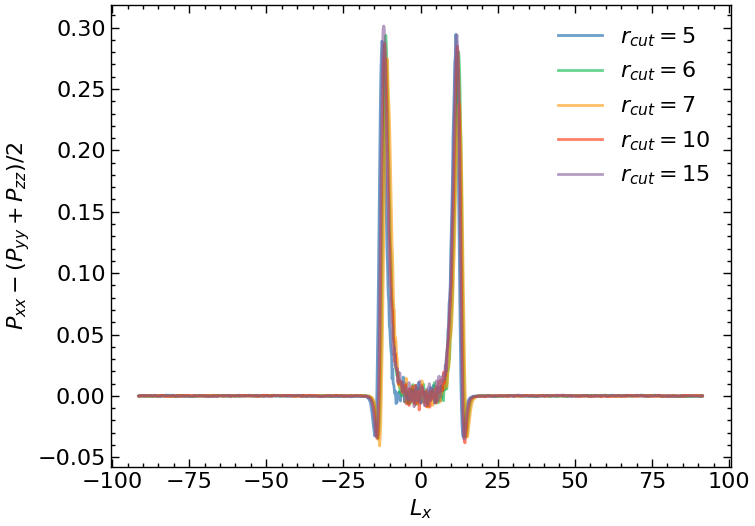

In [107]:
Lz = 1.8424304618039443e2 - 1.5490449242175544
grid = np.linspace(-Lz / 2, Lz / 2, len(pxx))
grid2 = np.linspace(-Lz / 2, Lz / 2, len(pxx) // 2)

tensions_array = []
tensions_array2 = []
for i in [5, 6, 7, 10, 15]:
    
    pxx, pyy, pzz, dens = get_p(f'cut{i}')
    integrant = -(pxx - (pyy + pzz) / 2) * dens
    plt.plot(grid, -(pxx - (pyy + pzz) / 2) * dens, 
             label=rf'$r_{{cut}} = {i}$', alpha=alph);
    tensions_array.append(trapezoid(integrant, grid))
    tensions_array2.append(trapezoid(integrant[::2], grid2))
plt.xlabel('$L_x$')
plt.ylabel('$P_{xx} - (P_{yy} + P_{zz})/2$')
plt.legend()

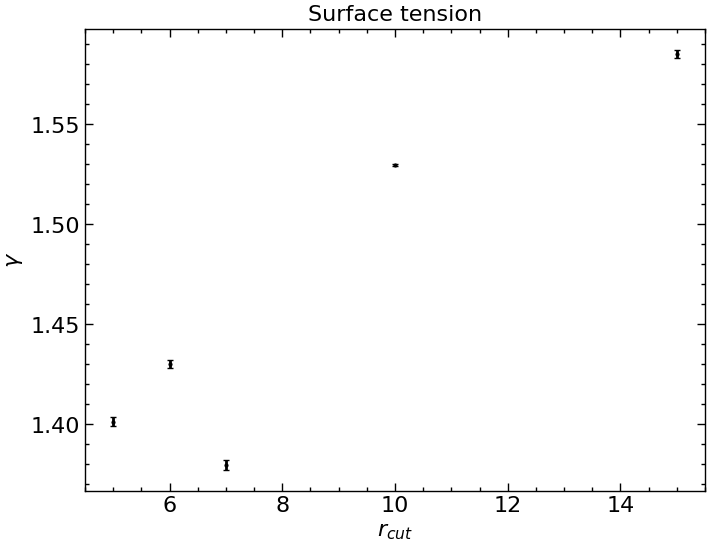

In [111]:
rcuts = [5, 6, 7, 10, 15]
p = 2
plt.errorbar(rcuts, (tensions_array), fmt='ok',
             yerr=(abs(np.array(tensions_array) - np.array(tensions_array2)) / (2 ** p - 1)), 
             markersize=2, capsize=2)
plt.xlabel('$r_{cut}$')
plt.ylabel('$\\gamma$');
plt.title('Surface tension');

/tmp/ipykernel_27771/1062236223.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, X, Y, p0=[ 1.63348814,  0.55939897,  0.15885935, -0.47806696])


(array([ 1.63348814,  0.55949751,  0.15885935, -0.47917525]),
 array([[inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf],
        [inf, inf, inf, inf]]))

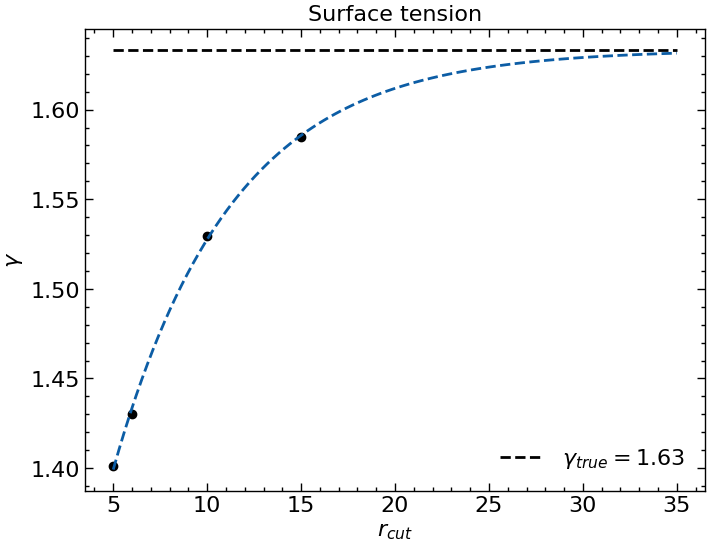

In [129]:
def func(x, gamma_true, gamma0, C, x0):
    return gamma_true - gamma0 * np.exp( - C * (x - x0))

X = np.delete(rcuts, 2)
Y = np.delete(tensions_array, 2)
popt, pcov = curve_fit(func, X, Y, p0=[ 1.63348814,  0.55939897,  0.15885935, -0.47806696])
plt.scatter(X, Y, c='k')
grid = np.linspace(X.min(), X.max() + 20, 100)
gamma_estimate = popt[0]
plt.plot(grid, func(grid, *popt), linestyle='--')
plt.hlines(gamma_estimate, X.min(), X.max() + 20, linestyle='--', color='k', 
           label=f'$\\gamma_{{true}} = {gamma_estimate:.2f}$')
plt.xlabel('$r_{cut}$')
plt.ylabel('$\\gamma$');
plt.title('Surface tension');
plt.legend(loc='lower right')
popt, pcov

In [ ]:
pxx = pd.read_csv('./cut3_5/stessx_avg.txt', names=['Ncount', 'c_stress_atom[1]'], sep=' ')['c_stress_atom[1]']
pyy = pd.read_csv('cut3_5/stessy_avg.txt', names=['Ncount', 'c_stress_atom[2]'], sep=' ')['c_stress_atom[2]']
pzz = pd.read_csv('cut3_5/stessz_avg.txt', names=['Ncount', 'c_stress_atom[3]'], sep=' ')['c_stress_atom[3]']
densx = pd.read_csv('cut3_5/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']
densy = pd.read_csv('cut3_5/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']
densz = pd.read_csv('cut3_5/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']
len(pyy), len(pxx), len(densy), len

(100, 1000, 1000)

In [34]:
x_grid = np.arange(0.0005, 1, 0.001)
y_grid = np.arange(0.005, 1, 0.01)
len(x_grid), len(y_grid), len(densy[::10] * pyy)

(1000, 100, 190)

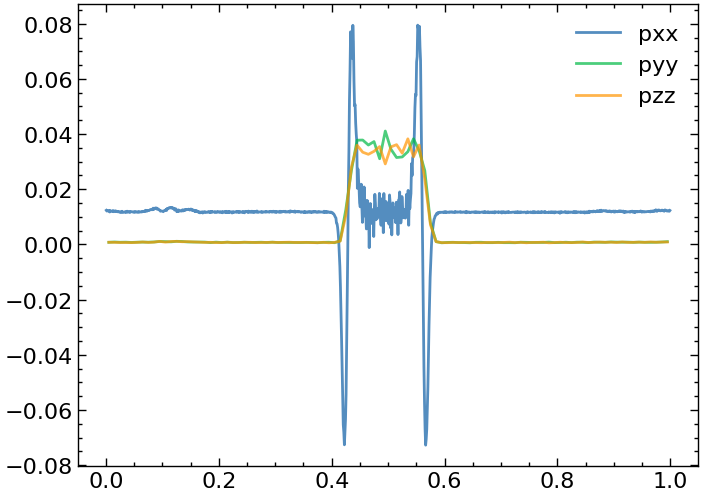

In [42]:
alph = 0.7
n_range = np.linspace(0, 1000, 100)
plt.plot(x_grid, -pxx * densx, alpha=alph, label='pxx')
plt.plot(y_grid, -pyy * densy[::10].to_numpy(), alpha=alph, label='pyy')
plt.plot(y_grid, -pzz * densz[::10].to_numpy(), alpha=alph, label='pzz')
plt.legend();

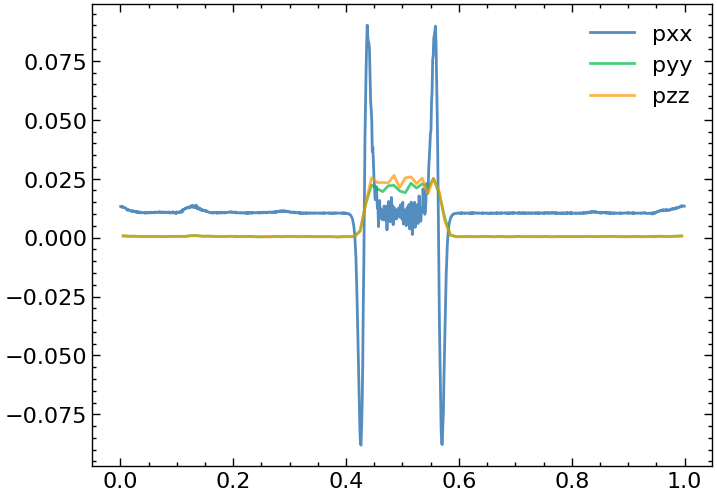

In [43]:
pxx = pd.read_csv('./cut4_0/stessx_avg.txt', names=['Ncount', 'c_stress_atom[1]'], sep=' ')['c_stress_atom[1]']
pyy = pd.read_csv('cut4_0/stessy_avg.txt', names=['Ncount', 'c_stress_atom[2]'], sep=' ')['c_stress_atom[2]']
pzz = pd.read_csv('cut4_0/stessz_avg.txt', names=['Ncount', 'c_stress_atom[3]'], sep=' ')['c_stress_atom[3]']
densx = pd.read_csv('cut4_0/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']
densy = pd.read_csv('cut4_0/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']
densz = pd.read_csv('cut4_0/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']

alph = 0.7
plt.plot(x_grid, -pxx * densx, alpha=alph, label='pxx')
plt.plot(y_grid, -pyy * densy[::10].to_numpy(), alpha=alph, label='pyy')
plt.plot(y_grid, -pzz * densz[::10].to_numpy(), alpha=alph, label='pzz')
plt.legend();


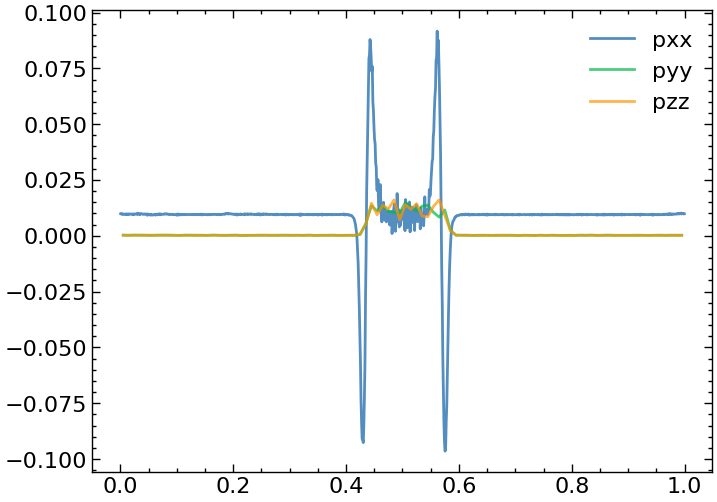

In [44]:
pxx = pd.read_csv('./cut4_5/stessx_avg.txt', names=['Ncount', 'c_stress_atom[1]'], sep=' ')['c_stress_atom[1]']
pyy = pd.read_csv('cut4_5/stessy_avg.txt', names=['Ncount', 'c_stress_atom[2]'], sep=' ')['c_stress_atom[2]']
pzz = pd.read_csv('cut4_5/stessz_avg.txt', names=['Ncount', 'c_stress_atom[3]'], sep=' ')['c_stress_atom[3]']
densx = pd.read_csv('cut4_5/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']
densy = pd.read_csv('cut4_5/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']
densz = pd.read_csv('cut4_5/densitx_avg.txt', names=['Ncount', 'dens'], sep=' ')['dens']

alph = 0.7
plt.plot(x_grid, -pxx * densx, alpha=alph, label='pxx')
plt.plot(y_grid, -pyy * densy[::10].to_numpy(), alpha=alph, label='pyy')
plt.plot(y_grid, -pzz * densz[::10].to_numpy(), alpha=alph, label='pzz')
plt.legend();
